<a href="https://colab.research.google.com/github/kvnvpham/space_missions/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 4.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df_data.isna().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
df_data[df_data.isna().any(axis=1)]

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
df_data.duplicated().any()

False

## Descriptive Statistics

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
df_data.describe()

,Unnamed: 0,Unnamed: 0.1
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
num_org_launches = df_data.groupby("Organisation", as_index=False)["Date"].count()
num_org_launches.sort_values("Date", ascending=False)[:10]

,Organisation,Date
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,251
35,NASA,203
52,VKS RF,201
49,US Air Force,161
48,ULA,140
6,Boeing,136
34,Martin Marietta,114


In [ ]:
launch_bar = px.bar(num_org_launches,
                    x="Organisation",
                    y="Date",
                    color="Date",
                    title="Number of Launches by Organization",)
launch_bar.update_layout(yaxis_title="Number of Launches",
                         xaxis_title="Organization",
                         xaxis={"categoryorder": "max descending"})
launch_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
df_status = df_data["Rocket_Status"].value_counts()
df_status

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [ ]:
status_bar = px.bar(df_status,
                    x=df_status.index,
                    y=df_status.values,
                    title="Number of Active vs Retired Rockets")
status_bar.update_layout(yaxis_title="Number of Active Rockets",
                         xaxis_title="Rocket Status")
status_bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
df_success_count = df_data.Mission_Status.value_counts()
df_success_count

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
success_count = px.bar(df_success_count,
                       x=df_success_count.index,
                       y=df_success_count.values,
                       title="Number of Successful vs Failed Missions")
success_count.update_layout(yaxis_title="Number of Missions",
                            xaxis_title="Status")
success_count.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [32]:
df_clean_price = df_data.dropna()
df_clean_price.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


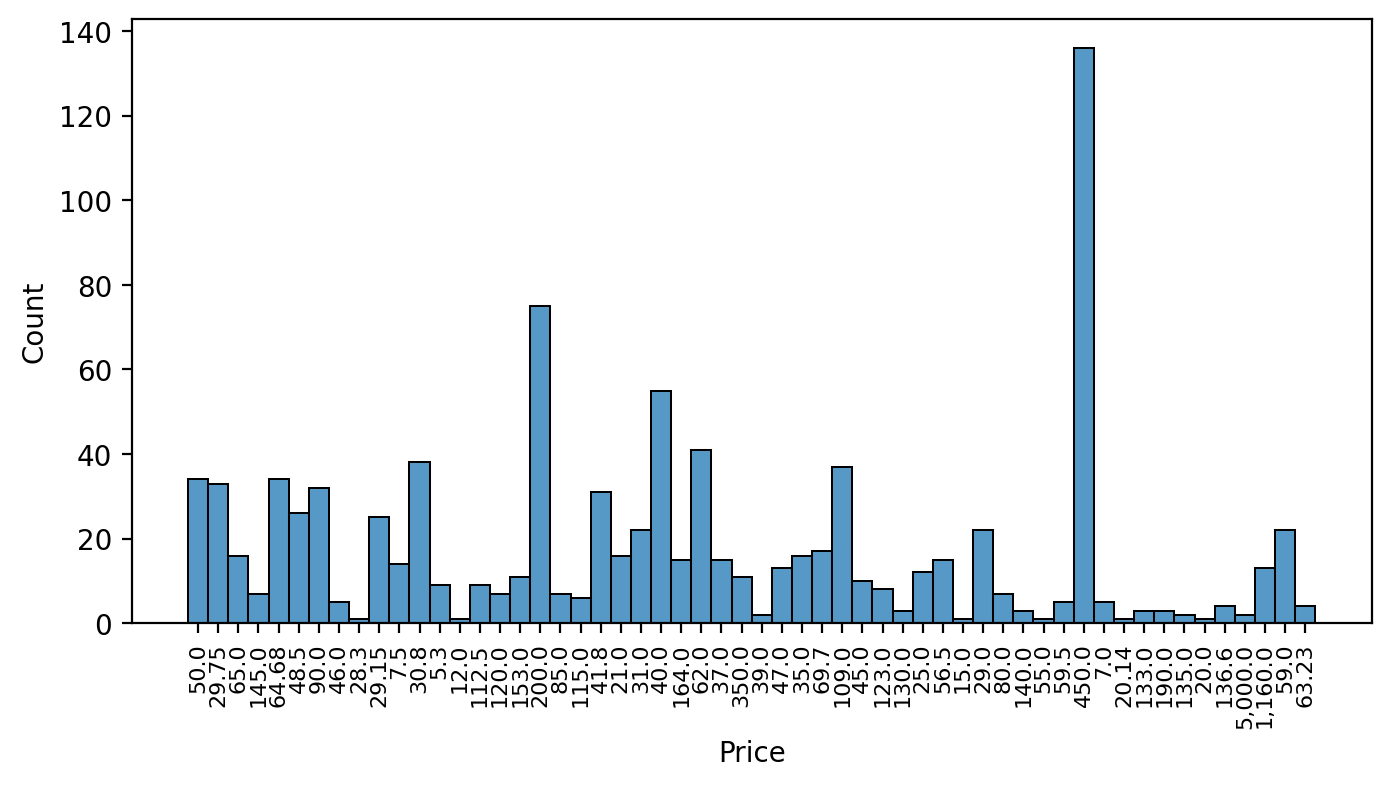

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
plt.xticks(rotation=90, fontsize=8)

price_hist = sns.histplot(df_clean_price,
                          x="Price",
                          bins=30)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [86]:
df_location = [x.split(", ")[-1] for x in df_data.Location]
df_location[:10]

['USA',
 'China',
 'USA',
 'Kazakhstan',
 'USA',
 'China',
 'Kazakhstan',
 'China',
 'USA',
 'Japan']

In [87]:
df_data.insert(4, "Country", df_location)

In [88]:
df_data.Country = df_data.Country.replace("Russia", "Russian Federation")
df_data.Country = df_data.Country.replace("New Mexico", "USA")
df_data.Country = df_data.Country.replace("Yellow Sea", "China")
df_data.Country = df_data.Country.replace("Shahrud Missile Test Site", "Iran")
df_data.Country = df_data.Country.replace("Pacific Missile Range Facility", "USA")
df_data.Country = df_data.Country.replace("Barents Sea", "Russian Federation")
df_data.Country = df_data.Country.replace("Gran Canaria", "USA")
df_data.Country = df_data.Country.replace("Pacific Ocean", "Liberia")

In [ ]:
mission_sites = df_data.groupby("Country", as_index=False).agg({"Mission_Status": pd.Series.count})
mission_sites.Country.replace("Australia", )

,Country,Mission_Status
0,Australia,6
1,Brazil,3
2,China,269
3,France,303
4,India,76
5,Iran,14
6,Israel,11
7,Japan,126
8,Kazakhstan,701
9,Kenya,9


In [ ]:
for country in mission_sites.Country:
  if country == "Iran":
    mission_sites.Country = mission_sites.Country.replace("Iran", countries.get("ir")[2])
  if country == "North Korea":
    mission_sites.Country = mission_sites.Country.replace("North Korea", "PRK")
  if country == "South Korea":
    mission_sites.Country = mission_sites.Country.replace("South Korea", countries.get("kor")[2])
  mission_sites.Country = mission_sites.Country.replace(country, countries.get(country)[2])

In [ ]:
mission_sites

,Country,Mission_Status
0,AUS,6
1,BRA,3
2,CHN,269
3,FRA,303
4,IND,76
5,IRN,14
6,ISR,11
7,JPN,126
8,KAZ,701
9,KEN,9


In [ ]:
country_cp = px.choropleth(mission_sites,
                           locations=mission_sites.Country,
                           color=mission_sites.Mission_Status,
                           color_continuous_scale="matter")
country_cp.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [92]:
for country in df_data.Country:
  if country == "Iran":
    df_data.Country = df_data.Country.replace("Iran", countries.get("ir")[2])
  if country == "North Korea":
    df_data.Country = df_data.Country.replace("North Korea", "PRK")
  if country == "South Korea":
    df_data.Country = df_data.Country.replace("South Korea", countries.get("kor")[2])
  df_data.Country = df_data.Country.replace(country, countries.get(country)[2])

In [ ]:
df_failure = df_data[df_data.Mission_Status == "Failure"]
df_failure.groupby("Country", as_index=False).agg({"Mission_Status": pd.Series.count})

,Country,Mission_Status
0,AUS,3
1,BRA,2
2,CHN,19
3,FRA,13
4,IND,8
5,IRN,8
6,ISR,2
7,JPN,10
8,KAZ,72
9,KOR,2


In [ ]:
failures_cp = px.choropleth(df_failure,
                            locations="Country",
                            color="Mission_Status",
                            color_continuous_scale="matter")
failures_cp.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
df_data

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,"Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",CHN,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,"Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",KAZ,"Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,"Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,"Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,"Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,"Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",KAZ,"Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
sunburst_df = df_data.groupby(["Country", "Organisation", "Mission_Status"], as_index=False).agg({"Mission_Status": pd.Series.count})
sunburst_df

,Country,Organisation,Mission_Status
0,AUS,AMBA,1
1,AUS,CECLES,2
2,AUS,CECLES,1
3,AUS,RAE,1
4,AUS,RAE,1
...,...,...,...
127,USA,US Air Force,129
128,USA,US Navy,14
129,USA,US Navy,1
130,USA,US Navy,2


In [ ]:
sb_status = px.sunburst(sunburst_df,
                        path=["Country",
                              "Organisation",
                              "Mission_Status"],
                        values="Mission_Status")
sb_status.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [33]:
df_clean_price.Price = df_clean_price.Price.str.replace(",", "")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
df_clean_price.Price = pd.to_numeric(df_clean_price.Price)

In [ ]:
prices = df_clean_price.groupby("Organisation", as_index=False).agg({"Price": pd.Series.sum})

In [ ]:
price_bar = px.bar(prices,
                   x="Organisation",
                   y="Price",
                   title="Amount Spent in Missions($ millions)")
price_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df_clean_price

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


In [ ]:
df_per_launch = df_clean_price.groupby("Organisation", as_index=False).agg({"Price": pd.Series.sum, "Date": pd.Series.count})

In [ ]:
df_per_launch["Per_Launch"] = df_per_launch.Price / df_per_launch.Date
df_per_launch[:10]

,Organisation,Price,Date,Per_Launch
0,Arianespace,"16,345.00",96,170.26
1,Boeing,"1,241.00",7,177.29
2,CASC,"6,340.26",158,40.13
3,EER,20.00,1,20.00
4,ESA,37.00,1,37.00
5,Eurockot,543.40,13,41.80
6,ExPace,28.30,1,28.30
7,ILS,"1,320.00",13,101.54
8,ISRO,"2,177.00",67,32.49
9,JAXA,168.00,3,56.00


In [ ]:
per_lauch_bar = px.bar(df_per_launch,
                       x="Per_Launch",
                       y="Organisation",
                       title="Price Per Launch Based on Organization ($ Millions)")
per_lauch_bar.update_layout(yaxis_title="Organization",
                            xaxis_title="Price Per Launch ($ Millions)")
per_lauch_bar.show()

# Chart the Number of Launches per Year

In [120]:
df_data.Date = pd.to_datetime(df_data.Date, utc=True)

In [ ]:
df_data["Year"] = df_data.Date.dt.year

In [ ]:
num_per_year = df_data.groupby("Year", as_index=False).agg({"Mission_Status": pd.Series.count})
num_per_year

,Year,Mission_Status
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


In [ ]:
launch_per_year = px.line(num_per_year,
                         x="Year",
                         y="Mission_Status",
                         title="Number of Launches Per Year")
launch_per_year.update_layout(yaxis_title="Year",
                              xaxis_title="Number of Launches")
launch_per_year.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
months_per_launch = df_data.groupby("Date", as_index=False).agg("size")
months_per_launch["Date"] = pd.to_datetime(months_per_launch.Date)

In [ ]:
months_per_launch.head()

,Date,size
0,1957-10-04 19:28:00+00:00,1
1,1957-11-03 02:30:00+00:00,1
2,1957-12-06 16:44:00+00:00,1
3,1958-02-01 03:48:00+00:00,1
4,1958-02-05 07:33:00+00:00,1


In [ ]:
month_data = months_per_launch.resample("M", on="Date").sum()

In [ ]:
month_data.reset_index()

,Date,size
0,1957-10-31 00:00:00+00:00,1
1,1957-11-30 00:00:00+00:00,1
2,1957-12-31 00:00:00+00:00,1
3,1958-01-31 00:00:00+00:00,0
4,1958-02-28 00:00:00+00:00,2
...,...,...
750,2020-04-30 00:00:00+00:00,5
751,2020-05-31 00:00:00+00:00,9
752,2020-06-30 00:00:00+00:00,7
753,2020-07-31 00:00:00+00:00,14


In [ ]:
df_roll = month_data["size"].rolling(window=6).mean()
df_roll

Date
1957-10-31 00:00:00+00:00    NaN
1957-11-30 00:00:00+00:00    NaN
1957-12-31 00:00:00+00:00    NaN
1958-01-31 00:00:00+00:00    NaN
1958-02-28 00:00:00+00:00    NaN
                            ... 
2020-04-30 00:00:00+00:00   9.67
2020-05-31 00:00:00+00:00   9.17
2020-06-30 00:00:00+00:00   7.67
2020-07-31 00:00:00+00:00   8.67
2020-08-31 00:00:00+00:00   7.67
Freq: M, Name: size, Length: 755, dtype: float64

In [ ]:
month_data

,size
Date,
1957-10-31 00:00:00+00:00,1
1957-11-30 00:00:00+00:00,1
1957-12-31 00:00:00+00:00,1
1958-01-31 00:00:00+00:00,0
1958-02-28 00:00:00+00:00,2
...,...
2020-04-30 00:00:00+00:00,5
2020-05-31 00:00:00+00:00,9
2020-06-30 00:00:00+00:00,7


In [ ]:
years = mdates.YearLocator()
months = mdates.MonthLocator(interval=6)
year_fmt = mdates.DateFormatter("%Y")

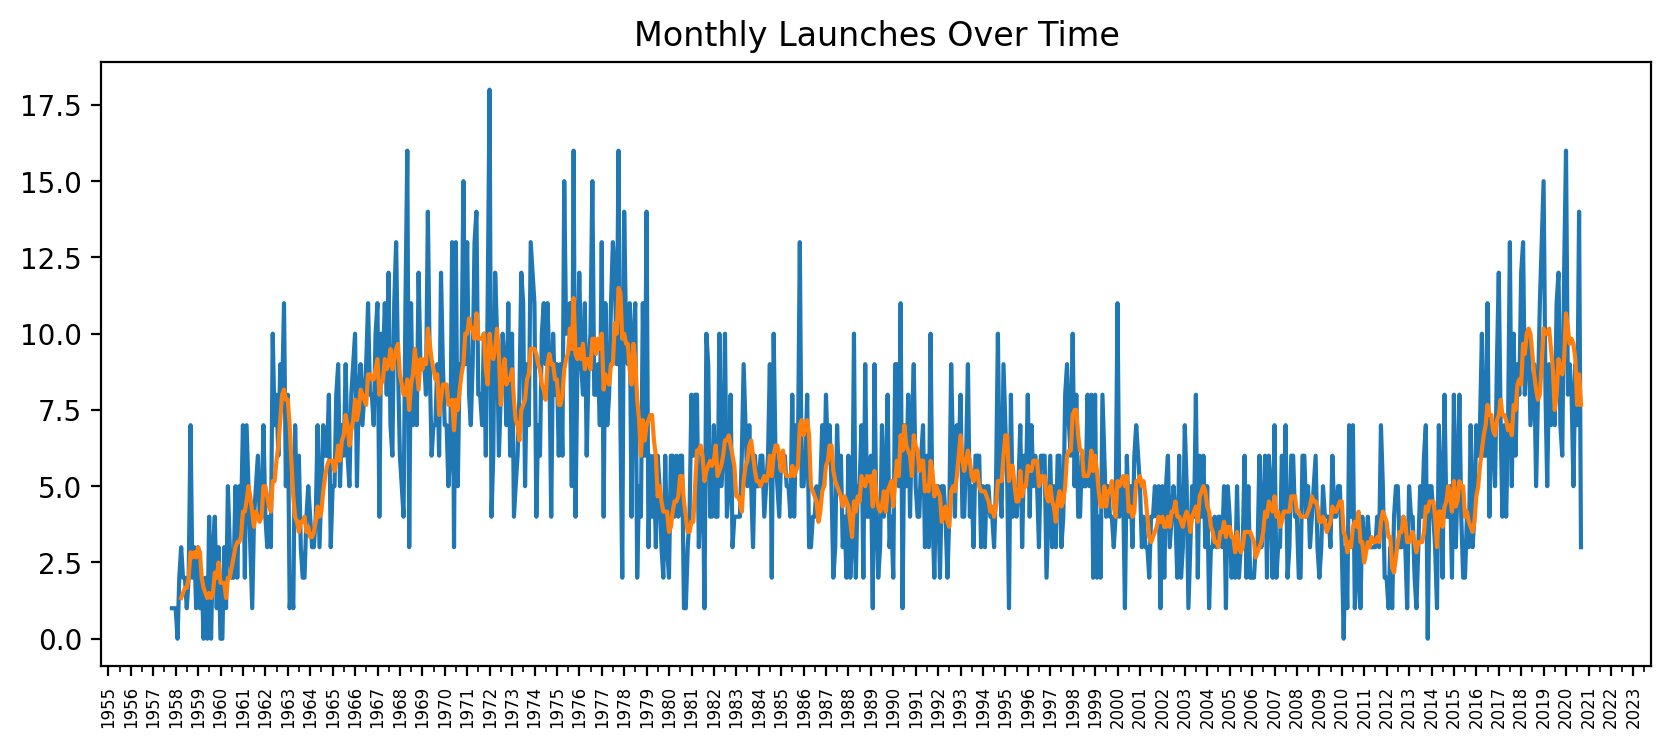

In [ ]:
plt.figure(figsize=(10,4), dpi=200)
plt.title("Monthly Launches Over Time")

ax = plt.gca()

ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(year_fmt)

ax.tick_params(axis="x",labelsize=6, rotation=90)

ax.plot(month_data.index, month_data["size"])
ax.plot(month_data.index, df_roll.values)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
df_data["Month"] = df_data.Date.dt.month

In [ ]:
month = df_data.groupby("Month", as_index=False).agg({"Mission_Status": pd.Series.count})
month

,Month,Mission_Status
0,1,268
1,2,336
2,3,353
3,4,383
4,5,326
5,6,402
6,7,351
7,8,373
8,9,365
9,10,381


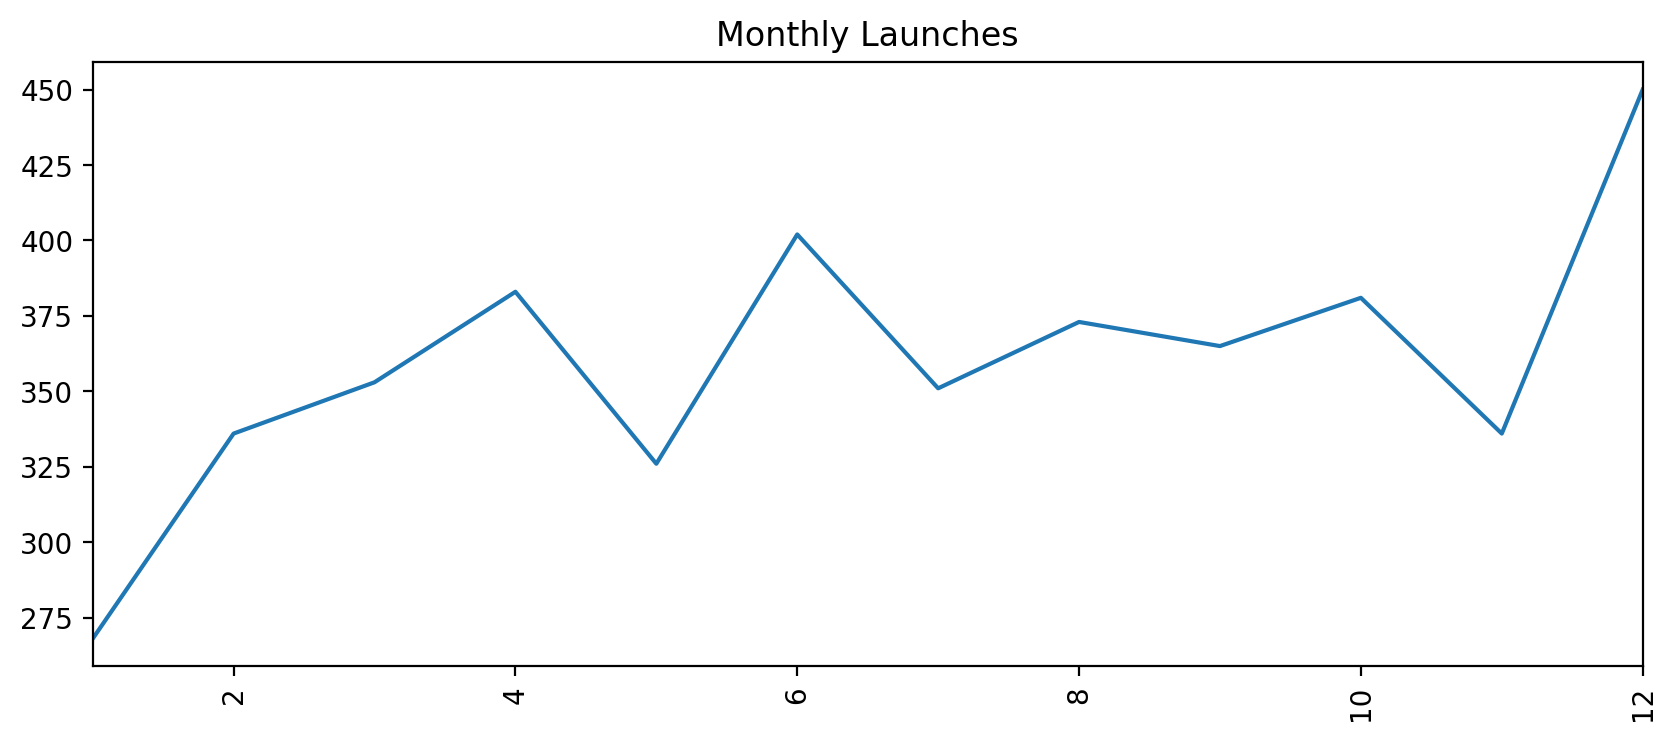

In [ ]:
plt.figure(figsize=(10,4), dpi=200)
plt.title("Monthly Launches")

plt.xticks(rotation=90)
plt.xlim([month.Month.min(), month.Month.max()])

plt.plot(month["Month"], month["Mission_Status"])
plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [35]:
avg_price = df_clean_price.groupby("Date", as_index=False).agg({"Price": pd.Series.mean})
avg_price

,Date,Price
0,1964-09-01 15:00:00+00:00,63.23
1,1964-12-10 16:52:00+00:00,63.23
2,1965-02-11 15:19:00+00:00,63.23
3,1965-05-06 15:00:00+00:00,63.23
4,1966-07-29 18:43:00+00:00,59.00
...,...,...
958,2020-07-25 03:13:00+00:00,64.68
959,2020-07-30 11:50:00+00:00,145.00
960,2020-07-30 21:25:00+00:00,65.00
961,2020-08-06 04:01:00+00:00,29.75


In [40]:
avg_price_year = avg_price.resample("Y", on="Date").mean()
avg_price_year = avg_price_year.reset_index()
avg_price_year = avg_price_year.dropna()

In [41]:
avg_price_line = px.line(avg_price_year,
                         x="Date",
                         y="Price",
                         title="Average Price of Rockets Over Time")
avg_price_line.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [68]:
top_10_org = df_data.groupby("Organisation", as_index=False).agg({"Mission_Status": pd.Series.count})
top_orgs = top_10_org.sort_values("Mission_Status", ascending=False)[:10]
top_orgs

,Organisation,Mission_Status
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,251
35,NASA,203
52,VKS RF,201
49,US Air Force,161
48,ULA,140
6,Boeing,136
34,Martin Marietta,114


In [69]:
top_10_orgs_date = df_data.groupby(["Organisation", "Date"], as_index=False).agg({"Mission_Status": pd.Series.count})

In [78]:
merge_df = pd.merge(top_10_orgs_date, top_orgs, on="Organisation")
merge_df.columns = ["Organization", "Date", "Num_Launches", "Total_Launches"]
ordered_date = merge_df.sort_values("Date")[["Date", "Organization", "Num_Launches", "Total_Launches"]]

In [84]:
cumul_launches = ordered_date.groupby(["Organization", "Date"]).sum()
cumul_launches = cumul_launches.groupby(level=[0]).cumsum()
cumul_launches.reset_index(inplace=True)
cumul_launches = cumul_launches[["Organization", "Date", "Num_Launches"]]
cumul_launches

,Organization,Date,Num_Launches
0,Arianespace,1984-05-23 01:33:00+00:00,1
1,Arianespace,1984-08-04 13:32:00+00:00,2
2,Arianespace,1984-11-10 01:14:00+00:00,3
3,Arianespace,1985-02-08 23:22:00+00:00,4
4,Arianespace,1985-05-08 01:15:00+00:00,5
...,...,...,...
3507,VKS RF,2019-12-11 08:54:00+00:00,197
3508,VKS RF,2019-12-26 23:11:00+00:00,198
3509,VKS RF,2020-02-20 08:24:00+00:00,199
3510,VKS RF,2020-03-16 18:28:00+00:00,200


In [85]:
org_line = px.line(cumul_launches,
                   x="Date",
                   y="Num_Launches",
                   color="Organization",
                   title="Launches Over Time by Organization")
org_line.update_layout(yaxis_title="Number of Launches",
                       xaxis_title="Date")
org_line.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [100]:
df_countries = df_data.groupby("Country", as_index=False).agg({"Mission_Status": pd.Series.count})
cold_war = df_countries[(df_countries.Country == "USA") | (df_countries.Country == "RUS") | (df_countries.Country == "KAZ")]
cold_war

,Country,Mission_Status
8,KAZ,701
14,RUS,1398
15,USA,1351


In [103]:
cold_war_pie = px.pie(cold_war,
                      names="Country",
                      values="Mission_Status",
                      title="Number of Launches between USA and USSR")
cold_war_pie.update_traces(textposition="inside",
                           textinfo="percent+label")
cold_war_pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [110]:
superpowers = df_data.groupby("Country", as_index=False).agg({"Mission_Status": pd.Series.count})
superpowers = superpowers[(superpowers.Country == "USA") | (superpowers.Country == "RUS")]
superpowers

,Country,Mission_Status
14,RUS,1398
15,USA,1351


In [132]:
superpower_dates = df_data.groupby(["Country", "Date"], as_index=False).agg({"Mission_Status": pd.Series.count})
superpower_dates = superpower_dates.groupby("Country").resample("Y", on="Date").sum()
superpower_dates.reset_index(inplace=True)
superpower_dates

,Country,Date,Mission_Status
0,AUS,1967-12-31 00:00:00+00:00,1
1,AUS,1968-12-31 00:00:00+00:00,1
2,AUS,1969-12-31 00:00:00+00:00,1
3,AUS,1970-12-31 00:00:00+00:00,2
4,AUS,1971-12-31 00:00:00+00:00,1
...,...,...,...
511,USA,2016-12-31 00:00:00+00:00,27
512,USA,2017-12-31 00:00:00+00:00,30
513,USA,2018-12-31 00:00:00+00:00,34
514,USA,2019-12-31 00:00:00+00:00,27


In [138]:
merge_super = pd.merge(superpower_dates, superpowers, on="Country")
merge_super.columns = ["Country", "Date", "Num_Launches", "Total_Launches"]
merge_super = merge_super.sort_values("Date")[["Date", "Country", "Num_Launches", "Total_Launches"]]

In [144]:
cumul_super = merge_super.groupby(["Country", "Date"])[["Country", "Date", "Num_Launches"]].sum()
cumul_super = cumul_super.groupby(level=0).cumsum()
cumul_super.reset_index(inplace=True)
cumul_super

,Country,Date,Num_Launches
0,RUS,1961-12-31 00:00:00+00:00,2
1,RUS,1962-12-31 00:00:00+00:00,10
2,RUS,1963-12-31 00:00:00+00:00,18
3,RUS,1964-12-31 00:00:00+00:00,26
4,RUS,1965-12-31 00:00:00+00:00,36
...,...,...,...
119,USA,2016-12-31 00:00:00+00:00,1239
120,USA,2017-12-31 00:00:00+00:00,1269
121,USA,2018-12-31 00:00:00+00:00,1303
122,USA,2019-12-31 00:00:00+00:00,1330


In [147]:
super_line = px.line(cumul_super,
                     x="Date",
                     y="Num_Launches",
                     color="Country",
                     title="Number of Launches Per Year, USA vs USSR")
super_line.update_layout(yaxis_title="Number of Launches",
                         xaxis_title="Year")
super_line.show()

## Chart the Total Number of Mission Failures Year on Year.

In [159]:
failures = df_data[df_data.Mission_Status == "Failure"]
df_failures = failures.groupby(["Country", "Date"], as_index=False).agg({"Mission_Status": pd.Series.count})
df_failures = df_failures.groupby("Country").resample("Y", on="Date").sum()
df_failures = df_failures.groupby(level=0).cumsum()
df_failures.reset_index(inplace=True)
df_failures.columns = ["Country", "Date", "Failure_Count"]
df_failures

,Country,Date,Failure_Count
0,AUS,1969-12-31 00:00:00+00:00,1
1,AUS,1970-12-31 00:00:00+00:00,3
2,BRA,1997-12-31 00:00:00+00:00,1
3,BRA,1998-12-31 00:00:00+00:00,1
4,BRA,1999-12-31 00:00:00+00:00,2
...,...,...,...
429,USA,2016-12-31 00:00:00+00:00,127
430,USA,2017-12-31 00:00:00+00:00,127
431,USA,2018-12-31 00:00:00+00:00,127
432,USA,2019-12-31 00:00:00+00:00,128


In [160]:
failures_line = px.line(df_failures,
                        x="Date",
                        y="Failure_Count",
                        color="Country",
                        title="Number of Failures Per Year by Organization")
failures_line.update_layout(yaxis_title="Number of Failures",
                           xaxis_title="Year")
failures_line.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [165]:
failures_total = failures.groupby("Country").agg({"Mission_Status": pd.Series.count})
failures_total

,Mission_Status
Country,
AUS,3
BRA,2
CHN,19
FRA,13
IND,8
IRN,8
ISR,2
JPN,10
KAZ,72


In [175]:
failures_percent = failures.groupby(["Country", "Date"], as_index=False).agg({"Mission_Status": pd.Series.count})
df_fail_percentage = pd.merge(failures_percent, failures_total, on="Country")
df_fail_percentage.columns = ["Country", "Date", "Num_Failures_Year", "Total_Failures"]
df_fail_percentage["pct"] = df_fail_percentage.Num_Failures_Year / df_fail_percentage.Total_Failures
df_fail_percentage =  df_fail_percentage.groupby("Country").resample("Y", on="Date").sum()
df_fail_percentage.reset_index(inplace=True)
df_fail_percentage

,Country,Date,Num_Failures_Year,Total_Failures,pct
0,AUS,1969-12-31 00:00:00+00:00,1,3,0.33
1,AUS,1970-12-31 00:00:00+00:00,2,6,0.67
2,BRA,1997-12-31 00:00:00+00:00,1,2,0.50
3,BRA,1998-12-31 00:00:00+00:00,0,0,0.00
4,BRA,1999-12-31 00:00:00+00:00,1,2,0.50
...,...,...,...,...,...
429,USA,2016-12-31 00:00:00+00:00,0,0,0.00
430,USA,2017-12-31 00:00:00+00:00,0,0,0.00
431,USA,2018-12-31 00:00:00+00:00,0,0,0.00
432,USA,2019-12-31 00:00:00+00:00,1,129,0.01


In [182]:
fail_percent = px.line(df_fail_percentage,
                       x="Date",
                       y="pct",
                       color="Country",
                       title="Percentage of Failures Per Year by Country")
fail_percent.update_layout(yaxis_title="Percentage of Failures",
                           xaxis_title="Year")
fail_percent.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [192]:
lead_launches = df_data.groupby(["Country", "Date"], as_index=False).agg({"Mission_Status": pd.Series.count})
lead_launches = lead_launches.groupby("Country").resample("Y", on="Date").sum()
lead_launches = lead_launches.groupby(level=0).cumsum()
lead_launches.reset_index(inplace=True)
lead_launches.columns = ["Country", "Date", "Num_Launches"]
lead_launches

,Country,Date,Num_Launches
0,AUS,1967-12-31 00:00:00+00:00,1
1,AUS,1968-12-31 00:00:00+00:00,2
2,AUS,1969-12-31 00:00:00+00:00,3
3,AUS,1970-12-31 00:00:00+00:00,5
4,AUS,1971-12-31 00:00:00+00:00,6
...,...,...,...
511,USA,2016-12-31 00:00:00+00:00,1239
512,USA,2017-12-31 00:00:00+00:00,1269
513,USA,2018-12-31 00:00:00+00:00,1303
514,USA,2019-12-31 00:00:00+00:00,1330


In [193]:
lead_launches = px.line(lead_launches,
                        x="Date",
                        y="Num_Launches",
                        color="Country",
                        title="Cumulative Number of Launches Each Year by Country")
lead_launches.update_layout(yaxis_title="Number of Launches",
                            xaxis_title="Year")
lead_launches.show()

In [203]:
success_launches = df_data[df_data.Mission_Status == "Success"]
cumul_success = success_launches.groupby(["Country", "Date"], as_index=False).agg({"Mission_Status": pd.Series.count})
cumul_success = cumul_success.groupby("Country").resample("Y", on="Date").sum()
cumul_success = cumul_success.groupby(level=0).cumsum()
cumul_success.reset_index(inplace=True)
cumul_success.columns = ["Country", "Date", "Success_Launches"]
cumul_success

,Country,Date,Success_Launches
0,AUS,1967-12-31 00:00:00+00:00,1
1,AUS,1968-12-31 00:00:00+00:00,2
2,AUS,1969-12-31 00:00:00+00:00,2
3,AUS,1970-12-31 00:00:00+00:00,2
4,AUS,1971-12-31 00:00:00+00:00,3
...,...,...,...
476,USA,2016-12-31 00:00:00+00:00,1081
477,USA,2017-12-31 00:00:00+00:00,1111
478,USA,2018-12-31 00:00:00+00:00,1144
479,USA,2019-12-31 00:00:00+00:00,1168


In [204]:
success_launches = px.line(cumul_success,
                           x="Date",
                           y="Success_Launches",
                           color="Country",
                           title="Cumulative Success Launches Per Year by Country")
success_launches.update_layout(yaxis_title="Num Successful Launches",
                               xaxis_title="Year")
success_launches.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [211]:
org_launches = df_data.groupby(["Organisation", "Date"], as_index=False).agg({"Mission_Status": pd.Series.count})
org_launches = org_launches.groupby("Organisation").resample("Y", on="Date").sum()
org_launches = org_launches.groupby(level=0).cumsum()
org_launches

Mission_Status
Organisation Date                                     
AEB          1997-12-31 00:00:00+00:00               1
             1998-12-31 00:00:00+00:00               1
             1999-12-31 00:00:00+00:00               2
             2000-12-31 00:00:00+00:00               2
             2001-12-31 00:00:00+00:00               2
...                                                ...
Yuzhmash     1988-12-31 00:00:00+00:00               1
             1989-12-31 00:00:00+00:00               1
             1990-12-31 00:00:00+00:00               1
             1991-12-31 00:00:00+00:00               2
i-Space      2019-12-31 00:00:00+00:00               1

[928 rows x 1 columns]

In [212]:
org_launches.reset_index(inplace=True)
org_launches.columns = ["Organization", "Date", "Num_Launches"]
org_launches

,Organization,Date,Num_Launches
0,AEB,1997-12-31 00:00:00+00:00,1
1,AEB,1998-12-31 00:00:00+00:00,1
2,AEB,1999-12-31 00:00:00+00:00,2
3,AEB,2000-12-31 00:00:00+00:00,2
4,AEB,2001-12-31 00:00:00+00:00,2
...,...,...,...
923,Yuzhmash,1988-12-31 00:00:00+00:00,1
924,Yuzhmash,1989-12-31 00:00:00+00:00,1
925,Yuzhmash,1990-12-31 00:00:00+00:00,1
926,Yuzhmash,1991-12-31 00:00:00+00:00,2


In [213]:
org_launches = px.line(org_launches,
                       x="Date",
                       y="Num_Launches",
                       color="Organization",
                       title="Cumulative Launches Per Year by Organization")
org_launches.update_layout(yaxis_title="Number of Launches",
                           xaxis_title="Year")
org_launches.show()